In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [20]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [21]:
digits.images.shape

(1797, 8, 8)

In [22]:
digits.images[0, :, :]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [23]:
set(digits.target)


{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

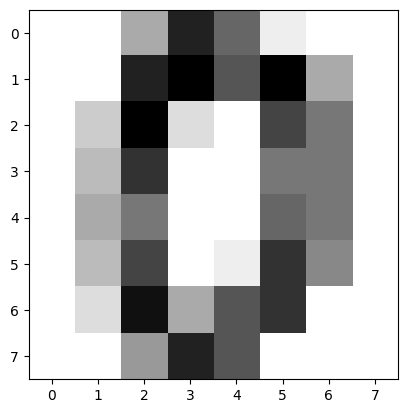

In [24]:
#
# Ejemplo de una imagen
#
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()


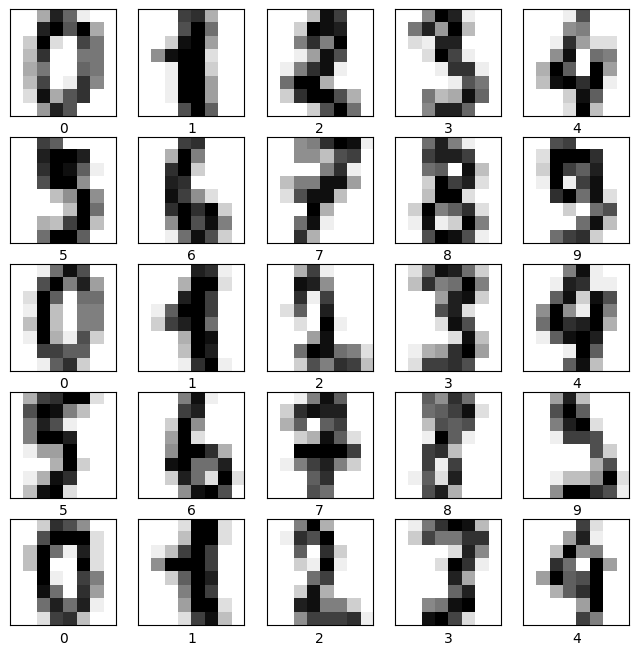

In [25]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()


In [26]:
#
# Cambio de las dimensiones de los datos
#

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [27]:
#
# Particionamiento de los datos
#
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,
)

In [28]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
estimator

LogisticRegression(max_iter=1000)

In [29]:
estimator.fit(
    X_train,
    y_train,
)

LogisticRegression(max_iter=1000)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(
    y_true=y_train,
    y_pred=estimator.predict(X_train),
)

1.0

In [31]:
predictions = estimator.predict(X_test)
predicted_proba = estimator.predict_proba(X_test)

accuracy_score(y_true=y_test, y_pred=predictions)

0.92880978865406

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [32]:
def plot_image(i, predicted_label, true_label, predicted_proba, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label[i] == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label[i],
            100 * max(predicted_proba[i, :]),
            true_label,
        ),
        color=color,
    )

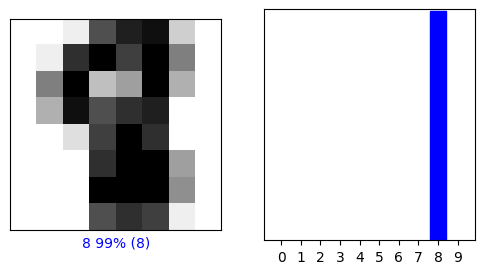

In [33]:
def plot_value_array(i, predicted_proba, predicted_label, true_label):
    #
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predicted_proba[i, :], color="#777777")
    plt.ylim([0, 1])
    #
    thisplot[predicted_label[i]].set_color("red")
    thisplot[true_label[i]].set_color("blue")
    
    
    
  
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(
    i,
    predictions,
    y_test,
    predicted_proba,
    X_test.reshape(len(X_test), 8, 8),
)
plt.subplot(1, 2, 2)
plot_value_array(
    i,
    predicted_proba,
    predictions,
    y_test,
)

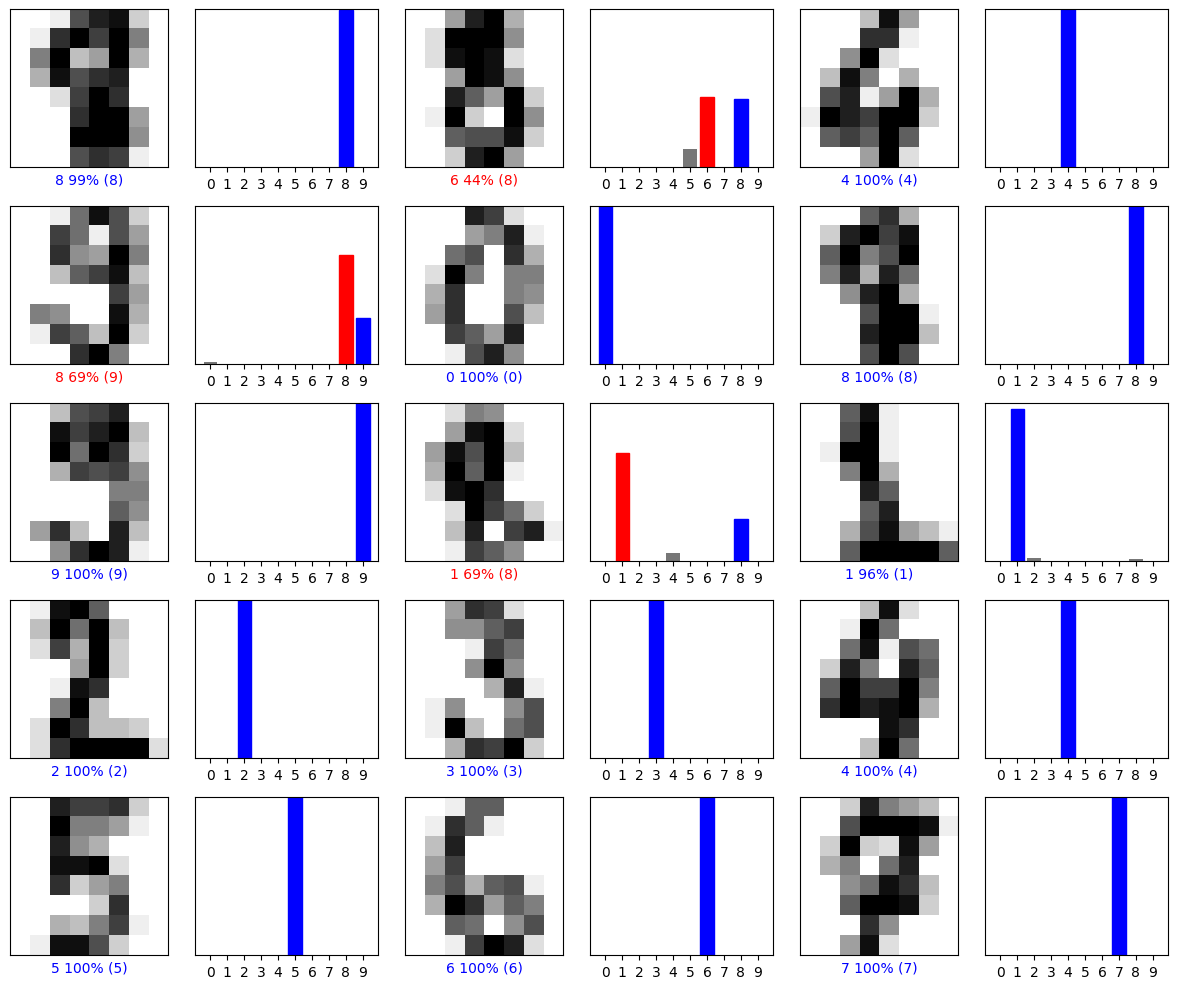

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(
        i,
        predictions,
        y_test,
        predicted_proba,
        X_test.reshape(len(X_test), 8, 8),
    )
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(
        i,
        predicted_proba,
        predictions,
        y_test,
    )
plt.tight_layout()
plt.show()


In [35]:
import pickle

with open("estimator.pkl", "wb") as file:
    pickle.dump(estimator, file)

In [36]:
with open("estimator.pickle", "rb") as file:
    new_clf = pickle.load(file)

accuracy_score(
    y_true=digits.target,
    y_pred=new_clf.predict(data),
)

/Users/scuartasr/Documents/Maestría/Analitica/Clase/2024-2-PRE-04-clasificacion-basica-de-imagenes-scuartasr/.venv/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


0.9660545353366722